# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)', 
    2:  'Speed limit (50km/h)', 
    3:  'Speed limit (60km/h)', 
    4:  'Speed limit (70km/h)', 
    5:  'Speed limit (80km/h)', 
    6:  'End of speed limit (80km/h)', 
    7:  'Speed limit (100km/h)', 
    8:  'Speed limit (120km/h)', 
    9:  'No passing', 
    10: 'No passing veh over 3.5 tons', 
    11: 'Right-of-way at intersection', 
    12: 'Priority road', 
    13: 'Yield', 
    14: 'Stop', 
    15: 'No vehicles', 
    16: 'Veh > 3.5 tons prohibited', 
    17: 'No entry', 
    18: 'General caution', 
    19: 'Dangerous curve left', 
    20: 'Dangerous curve right', 
    21: 'Double curve', 
    22: 'Bumpy road', 
    23: 'Slippery road', 
    24: 'Road narrows on the right', 
    25: 'Road work', 
    26: 'Traffic signals', 
    27: 'Pedestrians', 
    28: 'Children crossing', 
    29: 'Bicycles crossing', 
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing', 
    32: 'End speed + passing limits', 
    33: 'Turn right ahead', 
    34: 'Turn left ahead', 
    35: 'Ahead only', 
    36: 'Go straight or right', 
    37: 'Go straight or left', 
    38: 'Keep right', 
    39: 'Keep left', 
    40: 'Roundabout mandatory', 
    41: 'End of no passing', 
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [1]:
# #https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
# !pip install gdown
# !gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
# !unzip Traffic_Signs.zip

## Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [23]:
# specify the paths of images and labels
path = "Traffic_Signs/Traffic_Signs/Dataset" 
labelFile = 'Traffic_Signs/Traffic_Signs/Dataset_MetaData.csv' 

labels = pd.read_csv(labelFile)

In [25]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(count) + "/" + y)
        
        curImg = cv2.resize(curImg, (100, 100))  # Resize the image to 100x100
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1

print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [26]:
images.shape, classNo.shape

((39209, 100, 100, 3), (39209,))

In [27]:
images = np.array(images) / 255.0 # Normalize the images to a range of 0 to 1

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [31]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.15)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15)

In [32]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(28327, 100, 100, 3) (28327,)
Validation(5000, 100, 100, 3) (5000,)
Test(5882, 100, 100, 3) (5882,)


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [34]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # first convolutional layer
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # second convolutional layer
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),  
    
    layers.Dense(64, activation='relu'),
    layers.Dense(43, activation='softmax') # output layer
])

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,806,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,865,515 (7.12 MB)

 Trainable params: 1,865,515 (7.12 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [37]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_validation, y_validation))

Epoch 1/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 173s 176ms/step - accuracy: 0.4338 - loss: 2.0741 - val_accuracy: 0.9100 - val_loss: 0.3294
Epoch 2/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 136s 154ms/step - accuracy: 0.9172 - loss: 0.2745 - val_accuracy: 0.9638 - val_loss: 0.1364
Epoch 3/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 149s 168ms/step - accuracy: 0.9623 - loss: 0.1344 - val_accuracy: 0.9770 - val_loss: 0.0809
Epoch 4/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 139s 157ms/step - accuracy: 0.9756 - loss: 0.0822 - val_accuracy: 0.9702 - val_loss: 0.1063
Epoch 5/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 142s 160ms/step - accuracy: 0.9761 - loss: 0.0785 - val_accuracy: 0.9754 - val_loss: 0.0914


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [39]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9760 - loss: 0.0905
Test accuracy: 0.9743284583091736
Test loss: 0.09927631914615631


In [52]:
# save model
model.save("traffic_signs.h5")

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [41]:
# #https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
# !gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
# !unzip Test_Dataset.zip

# predict on unseen data

In [56]:
# model = tf.keras.models.load_model('traffic_signs.h5')


# path = "Test_Dataset/Test_Dataset/Dataset"


# labelFile = 'Test_Dataset/Test_Dataset/Dataset_MetaData.csv'
# labels_df = pd.read_csv(labelFile)


# for img_name in os.listdir(path):
#     img_path = os.path.join(path, img_name)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, (100, 100))  
#     img = img / 255.0 
#     img = img.reshape(1, 100, 100, 3) 

#     
#     prediction = model.predict(img)
    
#     
#     predicted_class = labels_df.iloc[prediction.argmax()]['ClassId']
    
#     print(f"Image: {img_name}, Predicted Class: {predicted_class}")

The above is taking too long so I will predicr on one image from the unseen set instead of the whole set 

In [59]:
model = tf.keras.models.load_model('traffic_signs.h5')


path = "Test_Dataset/Test_Dataset/Dataset"


labelFile = 'Test_Dataset/Test_Dataset/Dataset_MetaData.csv'
labels_df = pd.read_csv(labelFile)


image_files = os.listdir(path)

# random image
selected_img_name = random.choice(image_files)
selected_img_path = os.path.join(path, selected_img_name)


img = cv2.imread(selected_img_path)
img = cv2.resize(img, (100, 100))  # Resize 
img = img / 255.0  # Normalize 
img = img.reshape(1, 100, 100, 3)  # Reshape 


prediction = model.predict(img)

predicted_class = labels_df.iloc[prediction.argmax()]['ClassId']

print(f"Selected Image: {selected_img_name}, Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Selected Image: 02816.png, Predicted Class: 1


In [61]:
selected_row = labels_df[labels_df['Path'] == 'Dataset/02816.png']
selected_row # indeed the model predicted image 2816 as 1 correctly

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
2816,38,37,6,6,33,32,1,Dataset/02816.png


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

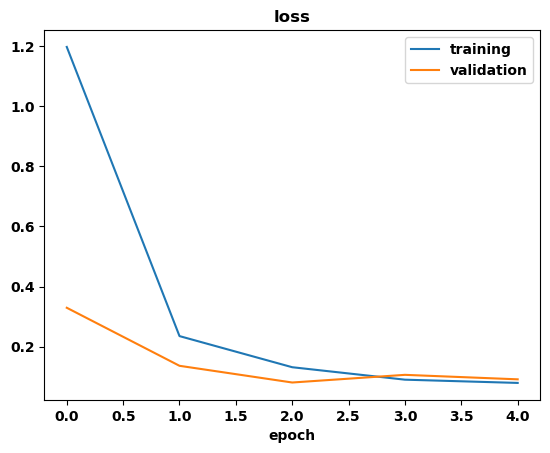

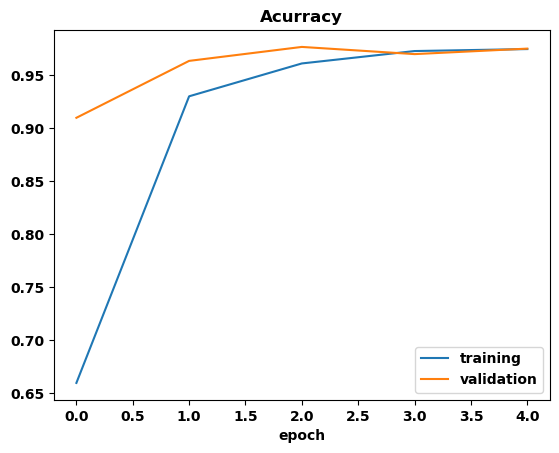

In [57]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
#already saved above

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
- Data preprocessing: resized images to 100x100, and normalized by dividing over 255, no data augmentation was implemented since the data is large and due time constraints it would have been too computationally expensive. 
- Model architecture: CNN with Input layer containing 3x3 filter, a maxpooling layers, dropout layers flatten layers and output layer containing 43 indicating that there're 43 class.
-  Activation functions: Two types of activation function used relu and in output layer softmax since it's a classification problem.
- Training process: default batch size was used, with 5 epochs and Adam as an optimizer.
- Loss function and metrics: sparse_categorical_crossentropy as loss function and accuracy as metric.
- Regularizarion: Dropout layers were used to prevent overfitting.
- Model evaluation: using the accuracy the CNN model achieved  0.9761 for training, 0.9754 for validation and 0.9760 for testing with low loss values.
- Model visualization: Visualization both the accuracy and loss the model appear to perform well with great generalization ability.
- Overfittinfg and underfitting: The model is not overfitting or underfitting, so no additional procedure to implement.